In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("name.png")

In [3]:
img2 = img.copy()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

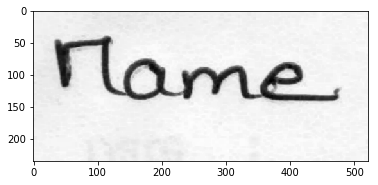

In [5]:
plt.imshow(gray , cmap=plt.get_cmap('gray'))

In [6]:
black = np.zeros_like(img)
cv2.imshow("black.jpg", black)

In [7]:

ret, threshed_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)



In [4]:
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0]) #added by OP : this sorts contours left to right, so images come in order

for cnt in contours:
    hull = cv2.convexHull(cnt)

    img3 = img.copy()
    black2 = black.copy()

    #--- Here is where I am filling the contour after finding the convex hull ---
    cv2.drawContours(black2, [hull], -1, (255, 255, 255), -1)
    g2 = cv2.cvtColor(black2, cv2.COLOR_BGR2GRAY)
    r, t2 = cv2.threshold(g2, 127, 255, cv2.THRESH_BINARY)
    cv2.imshow("t2.jpg", t2)
#     plt.imshow(t2)

    masked = cv2.bitwise_and(img2, img2, mask = t2)    
#     cv2.imshow("masked.jpg", masked)

    print(len(hull))
    cv2.waitKey(0)


NameError: name 'contours' is not defined

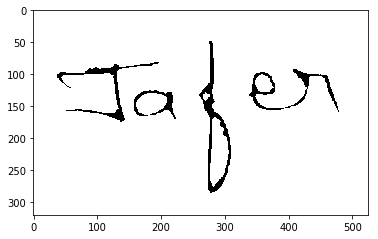

In [2]:
import cv2
import numpy as np

img = cv2.imread('name__.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(4,4))
done = False

# while( not done):
eroded = cv2.erode(img,element)
temp = cv2.dilate(eroded,element)
temp = cv2.dilate(temp,element)
temp = cv2.dilate(temp,element)
# temp = cv2.dilate(temp,element)
# temp = cv2.erode(temp,element)
# temp = cv2.subtract(img,temp)
# skel = cv2.bitwise_or(skel,temp)
# img = eroded.copy()
# print("HI")
# zeros = size - cv2.countNonZero(img)
# if zeros==size:
#     done = True

# cv2.imshow("skel",skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(temp , cmap=plt.get_cmap("gray")) 

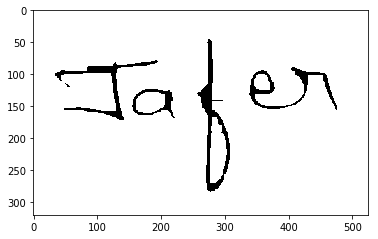

In [13]:
import cv2
import numpy as np

img = cv2.imread('name__.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(4,4))
done = False

# # while( not done):
# eroded = cv2.erode(img,element)
# temp = cv2.dilate(eroded,element)
# temp = cv2.dilate(temp,element)
# temp = cv2.dilate(temp,element)


kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
eroded = cv2.dilate(opening,kernel,iterations = 1)



# temp = cv2.dilate(temp,element)
# temp = cv2.erode(temp,element)
# temp = cv2.subtract(img,temp)
# skel = cv2.bitwise_or(skel,temp)
# img = eroded.copy()
# print("HI")
# zeros = size - cv2.countNonZero(img)
# if zeros==size:
#     done = True

# cv2.imshow("skel",skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(eroded , cmap=plt.get_cmap("gray")) 

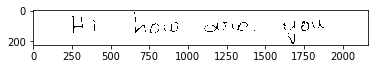

In [5]:
import cv2
import numpy as np

img = cv2.imread('word_4.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(4,4))
done = False

# while( not done):
eroded = cv2.erode(img,element)
temp = cv2.dilate(eroded,element)
temp = cv2.dilate(temp,element)
temp = cv2.dilate(temp,element)


# temp = cv2.dilate(temp,element)
# temp = cv2.erode(temp,element)
# temp = cv2.subtract(img,temp)
# skel = cv2.bitwise_or(skel,temp)
# img = eroded.copy()
# print("HI")
# zeros = size - cv2.countNonZero(img)
# if zeros==size:
#     done = True

# cv2.imshow("skel",skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(temp , cmap=plt.get_cmap("gray")) 

In [ ]:
import cv2
import numpy as np

img = cv2.imread('word_1.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
done = False

# while( not done):
eroded = cv2.erode(img,element)
temp = cv2.dilate(eroded,element)
temp = cv2.dilate(temp,element)
temp = cv2.dilate(temp,element)


#find contours
im2,ctrs, hier = cv2.findContours(temp.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = img[y:y+h, x:x+w]
    # # roi = 
    # gray = image_to_gray(roi)
    # #binary
    # thresh = gray_to_binary_inv(gray)
    cv2.imwrite("word_w_"+str(i)+".png" , roi)

    # show ROI
    cv2.imshow('segment no:'+str(i),roi)
    # cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(0)

cv2.imshow('marked areas',img)
cv2.waitKey(0)



plt.imshow(temp , cmap=plt.get_cmap("gray")) 

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI


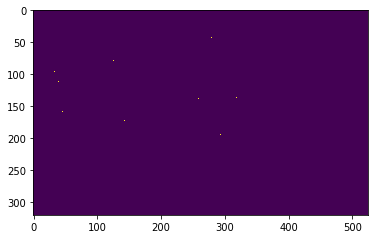

In [3]:
import cv2
import numpy as np
 
img = cv2.imread('name__.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

#binary
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# cv2.imshow('second',thresh)
# cv2.waitKey(0)
 
# ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
for i in range(10):
    eroded = cv2.erode(thresh,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(thresh,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    print ("HI")
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
        
# cv2.imshow("skel",skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(skel)

In [ ]:
import numpy as np
import cv2
from imutils import resize
from imutils.contours import sort_contours

from skimage.morphology import skeletonize as skl

path = '../reverse.png'
img = cv2.imread(path, 0)
# Some smoothing to get rid of the noise
# img = cv2.bilateralFilter(img, 5, 35, 10)
img = cv2.GaussianBlur(img, (3, 3), 3)
img = resize(img, width=700)

# Preprocessing to get the shapes
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 35, 11)
# Invert to hightligth the shape
th = cv2.bitwise_not(th)

# Text has mostly vertical and right-inclined lines. This kernel seems to
# work quite well
kernel = np.array([[0, 1, 1],
                  [0, 1, 0],
                  [1, 1, 0]], dtype='uint8')

th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)

cv2.imshow('mask', th)
cv2.waitKey(0)


#def contour_sorter(contours):
#    '''Sort the contours by multiplying the y-coordinate and sorting first by
#    x, then by y-coordinate.'''
#    boxes = [cv2.boundingRect(c) for c in contours]
#    cnt = [4*y, x for y, x, , _, _ in ]

# Skeletonize the shapes
# Skimage function takes image with either True, False or 0,1
# and returns and image with values 0, 1.
th = th == 255
th = skl(th)
th = th.astype(np.uint8)*255

# Find contours of the skeletons
_, contours, _ = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_NONE)
# Sort the contours left-to-rigth
contours, _ = sort_contours(contours, )
#
# Sort them again top-to-bottom


def skeleton_endpoints(skel):
    # Function source: https://stackoverflow.com/questions/26537313/
    # how-can-i-find-endpoints-of-binary-skeleton-image-in-opencv
    # make out input nice, possibly necessary
    skel = skel.copy()
    skel[skel != 0] = 1
    skel = np.uint8(skel)

    # apply the convolution
    kernel = np.uint8([[1,  1, 1],
                       [1, 10, 1],
                       [1,  1, 1]])
    src_depth = -1
    filtered = cv2.filter2D(skel, src_depth,kernel)

    # now look through to find the value of 11
    # this returns a mask of the endpoints, but if you just want the
    # coordinates, you could simply return np.where(filtered==11)
    out = np.zeros_like(skel)
    out[np.where(filtered == 11)] = 1
    rows, cols = np.where(filtered == 11)
    coords = list(zip(cols, rows))
    return coords

# List for endpoints
endpoints = []
# List for (x, y) coordinates of the skeletons
skeletons = []



for contour in contours:
    if cv2.arcLength(contour, True) > 100:
        # Initialize mask
        mask = np.zeros(img.shape, np.uint8)
        # Bounding rect of the contour
        x, y, w, h = cv2.boundingRect(contour)
        mask[y:y+h, x:x+w] = 255
        # Get only the skeleton in the mask area
        mask = cv2.bitwise_and(mask, th)
        # Take the coordinates of the skeleton points
        rows, cols = np.where(mask == 255)
        # Add the coordinates to the list
        skeletons.append(list(zip(cols, rows)))
        

        # Find the endpoints for the shape and update a list
        eps = skeleton_endpoints(mask)
        endpoints.append(eps)

        # Draw the endpoints
#         [cv2.circle(th, ep, 5, 255, 1) for ep in eps]
        cv2.imshow('mask', mask)
        cv2.waitKey(500)
cv2.imwrite("lrev.png",th)# Stack the original and modified
th = resize(np.hstack((img, th)), 1200)


#    cv2.waitKey(50)

# TODO
# Walk the points using the endpoints by minimizing the walked distance
# Points in between can be used many times, endpoints only once
cv2.imshow('mask', th)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
img = cv2.imread("Data.png")

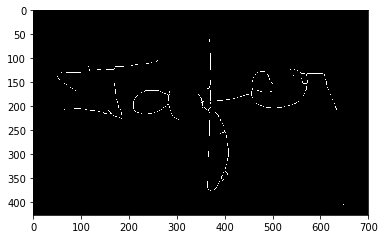

In [3]:
plt.imshow(img)

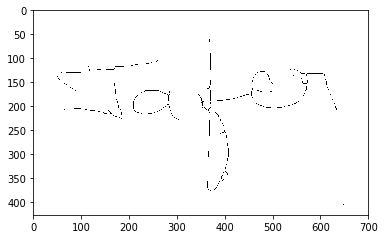

In [4]:
ret,thresh_s = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)


plt.imshow(thresh_s)


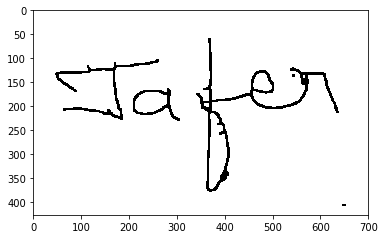

In [8]:
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.erode(thresh_s, kernel, iterations=2)
img_dilation = cv2.dilate(img_dilation, kernel, iterations=1)
plt.imshow(img_dilation)

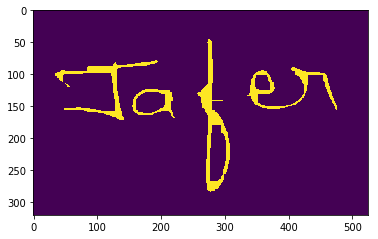

In [3]:
import cv2
import numpy as np
# from image_helper_functions import *
#import image
image = cv2.imread('name__.png')
#cv2.waitKey(0)

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray',gray)
# cv2.waitKey(0)

#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
# cv2.imshow('second',thresh)
# cv2.waitKey(0)

#binary
ret,thresh_s = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
# cv2.imshow('second',thresh)
# cv2.waitKey(0)

#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
# cv2.imshow('dilated',img_dilation)
# cv2.waitKey(0)

# thresh = cv2.dilate(thresh,kernel,iterations = 5)
# thresh = cv2.erode(thresh,kernel,iterations = 5)
# thresh = cv2.dilate(thresh,kernel,iterations = 5)
# thresh = cv2.erode(thresh,kernel,iterations = 5)


thresh = cv2.dilate(thresh,None,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 3)
thresh = cv2.dilate(thresh,None,iterations = 4)
thresh = cv2.erode(thresh,None,iterations = 6)
# thresh = cv2.dilate(thresh,None,iterations = 1)

plt.imshow(thresh)



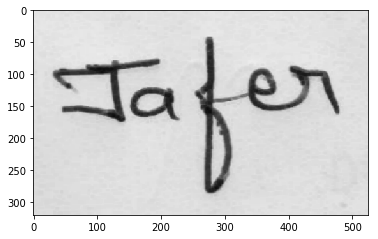

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('name__.png')
plt.imshow(img)
# image = cv2.dilate(img , None , iterations=1)
# plt.hist(img.ravel(),256,[0,256])
# plt.show()
# plt.imshow(image)

In [ ]:
import cv2
import numpy as np
image = cv2.imread("test1.png")
cv2.imshow('orig',image)
# image = cv2.resize(image_original,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# original_resized = cv2.resize(gray, (0,0), fx=.2, fy=.2)
cv2.imshow('gray',gray)
cv2.waitKey(0)

#Remove Salt and pepper noise
saltpep = cv2.fastNlMeansDenoising(gray,None,9,13)
# original_resized = cv2.resize(saltpep, (0,0), fx=.2, fy=.2)
cv2.imshow('Grayscale',saltpep)
cv2.waitKey(0)

#blur
blured = cv2.blur(saltpep,(3,3))
# original_resized = cv2.resize(blured, (0,0), fx=.2, fy=.2)
cv2.imshow('blured',blured)
cv2.waitKey(0)

#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
# original_resized = cv2.resize(thresh, (0,0), fx=.2, fy=.2)
cv2.imshow('Threshold',thresh)
cv2.waitKey(0)

#dilation
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
# original_resized = cv2.resize(img_dilation, (0,0), fx=.2, fy=.2)
cv2.imshow('dilated',img_dilation)
cv2.waitKey(0)

#find contours
im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[1])

for i, ctr in enumerate(sorted_ctrs):

    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]

# #   show ROI
    cv2.imshow('segment no:' +str(i),roi)
    cv2.waitKey(0)



    im = cv2.resize(roi,None,fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    ret_1,thresh_1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
    # original_resized = cv2.resize(thresh, (0,0), fx=.2, fy=.2)
    cv2.imshow('Threshold_1',thresh_1)
    cv2.waitKey(0)

    kernel = np.ones((10, 20), np.uint8)
    words = cv2.dilate(thresh_1, kernel, iterations=1)
    cv2.imshow('words', words)
    cv2.waitKey(0)


    words=cv2.cvtColor(words, cv2.COLOR_BGR2GRAY);

    #find contours
    im,ctrs_1, hier = cv2.findContours(words, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #sort contours
    sorted_ctrs_1 = sorted(ctrs_1, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for j, ctr_1 in enumerate(sorted_ctrs_1):

        # Get bounding box
        x_1, y_1, w_1, h_1 = cv2.boundingRect(ctr_1)

        # Getting ROI
        roi_1 = thresh_1[y_1:y_1+h_1, x_1:x_1+w_1]

        # #   show ROI
        cv2.imshow('Line no: ' + str(i) + " word no : " +str(j),roi_1)
        cv2.waitKey(0)

        chars = cv2.cvtColor(roi_1, cv2.COLOR_BGR2GRAY);

        # dilation
        kernel = np.ones((10, 1), np.uint8)
        joined = cv2.dilate(chars, kernel, iterations=1)
        # original_resized = cv2.resize(img_dilation, (0,0), fx=.2, fy=.2)
        cv2.imshow('joined', joined)
        cv2.waitKey(0)

        # find contours
        im, ctrs_2, hier = cv2.findContours(joined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # sort contours
        sorted_ctrs_2 = sorted(ctrs_2, key=lambda ctr: cv2.boundingRect(ctr)[0])



        for k, ctr_2 in enumerate(sorted_ctrs_2):
            # Get bounding box
            x_2, y_2, w_2, h_2 = cv2.boundingRect(ctr_2)

            # Getting ROI
            roi_2 = roi_1[y_2:y_2 + h_2, x_2:x_2 + w_2]

            # #   show ROI
            cv2.imshow('Line no: ' + str(i) + ' word no : ' + str(j) + ' char no: ' + str(k), roi_2)
            cv2.waitKey(0)

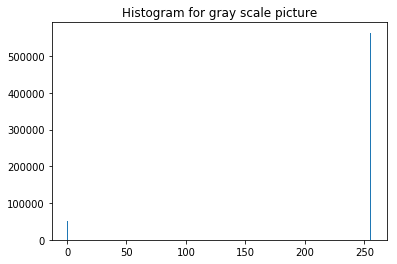

In [20]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

gray_img = cv2.imread('word_1.png', cv2.IMREAD_GRAYSCALE)
# ret,thresh = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
# plt.imshow(thresh)

hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.hist(gray_img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
# plt.imshow(thresh)

plt.show()